# 新冠状病毒传播数据分析

## 1. 疫情初步分析，筛选相关性强的特征

通过官方公布的日频疫情数据、各地区（全国各省、直辖市、港澳台，去掉疫情严重的湖北和武汉）的历史天气、人口、GDP、距离武汉公里数等数据，筛选和确诊人数相关性强的特征。

所有数据都有各省、直辖市、港澳台、以及武汉，省的天气数据统计的是所在省会城市的数据。

### 1.1. 现有特征数据展示

In [2]:
from coronavirus_analyzer import CoronavirusAnalyzer
# 初始化分析类
analyzer = CoronavirusAnalyzer()

In [3]:
# 地区相互距离矩阵
import pandas as pd
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 8)
print(analyzer.df_distance.index.tolist())
analyzer.df_distance

['北京', '上海', '天津', '重庆', '黑龙江', '吉林', '辽宁', '内蒙古', '河北', '山西', '山东', '河南', '陕西', '甘肃', '宁夏', '青海', '新疆', '安徽', '江苏', '浙江', '湖南', '江西', '湖北', '四川', '贵州', '福建', '台湾', '广东', '海南', '广西', '云南', '西藏', '香港', '澳门', '武汉']


,北京,上海,天津,重庆,...,西藏,香港,澳门,武汉
北京,0.000000,1063.211982,103.589069,1464.353444,...,2566.591142,1963.500780,1979.971010,1047.708830
上海,1063.211982,0.000000,961.335849,1448.054847,...,2907.958210,1227.709844,1272.272492,685.093039
...,...,...,...,...,...,...,...,...,...
澳门,1979.971010,1272.272492,1908.890967,1072.535924,...,2384.032442,64.228639,0.000000,934.088338
武汉,1047.708830,685.093039,981.317616,762.974248,...,2232.235661,921.636262,934.088338,0.000000


In [4]:
# 地区信息
import pandas as pd
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 12)
analyzer.df_info

,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉
地区,,,,,,,,,,,
全国,1.395380e+09,9.003000e+13,64520.059052,54776300.0,0.0000,964.998822,NaN,NaN,NaN,NaN,NaN
广东,1.134600e+08,9.727777e+12,85737.502203,590000.0,0.0052,17.970000,1583.818086,6.6,23.133333,113.250000,836.326981
...,...,...,...,...,...,...,...,...,...,...,...
西藏,3.371500e+06,1.477630e+11,43827.079935,0.0,0.0000,122.840000,364348.212962,3658.0,29.666667,91.166667,2232.235661
澳门,6.320000e+05,3.609000e+11,571044.303797,0.0,0.0000,0.002540,40.189873,19.0,22.216667,113.550000,934.088338


In [5]:
# 历史天气文字转数值
from weather_crawler import WeatherCrawler
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)

weather_crawler = WeatherCrawler()
weather_crawler.weather_info

,晴,多云,阴,雾,大雾,霾,中度霾,重度霾,阵雨,小雨,小到中雨,中雨,中到大雨,大雨,雨夹雪,阵雪,小雪,小到中雪,中雪,中到大雪,大雪
晴朗度,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
雾度,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
霾度,0,0,0,0,0,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0
降雨量,0,0,0,0,0,0,0,0,1,2,3,4,5,6,3,0,0,0,0,0,0
降雪量,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,3,4,5,6


In [6]:
# 历史天气（包括所有原始数据和天气文字转数值的数据，目前没有使用风向）
import pandas as pd
pd.set_option('display.max_columns', 40)
analyzer.df_weather.tail(2)

武汉 
 上海 
 ... 
 湖南 
 香港 
 
 
 
 上午天气 
 下午天气 
 上午温度 
 下午温度 
 风向 
 最低风速 
 最高风速 
 上午晴朗度 
 上午雾度 
 上午霾度 
 上午降雨量 
 上午降雪量 
 下午晴朗度 
 下午雾度 
 下午霾度 
 下午降雨量 
 下午降雪量 
 上午天气 
 下午天气 
 上午温度 
 ... 
 下午霾度 
 下午降雨量 
 下午降雪量 
 上午天气 
 下午天气 
 上午温度 
 下午温度 
 风向 
 最低风速 
 最高风速 
 上午晴朗度 
 上午雾度 
 上午霾度 
 上午降雨量 
 上午降雪量 
 下午晴朗度 
 下午雾度 
 下午霾度 
 下午降雨量 
 下午降雪量 
 
 
 日期 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2020-01-26 
 雨夹雪 
 阴 
 3 
 1 
 北风 
 4 
 5 
 0 
 0 
 0 
 3 
 3 
 1 
 0 
 0 
 0 
 0 
 中雨 
 小雨 
 10 
 ... 
 0 
 0 
 0 
 中雨 
 多云 
 19 
 14 
 无持续风向 
 1 
 2 
 0 
 0 
 0 
 4 
 0 
 2 
 0 
 0 
 0 
 0 
 
 
 2020-01-27 
 阴 
 晴 
 6 
 -1 
 北风 
 3 
 4 
 1 
 0 
 0 
 0 
 0 
 3 
 0 
 0 
 0 
 0 
 小雨 
 小雨 
 8 
 ... 
 0 
 0 
 0 
 多云 
 多云 
 17 
 11 
 无持续风向 
 1 
 2 
 2 
 0 
 0 
 0 
 0 
 2 
 0 
 0 
 0 
 0 
 
 
 
 2 rows × 595 columns

In [7]:
# 历史天气平均数据
analyzer.df_weather_average.head()

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,...,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量
地区,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
上海,14.111111,14.794702,5.277778,5.523179,7.055556,7.397351,4.555556,4.165563,2.777778,2.582781,2.277778,2.082781,1.388889,1.377483,0.722222,0.735099,0.694444,0.688742,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.555556,2.582781,1.222222,1.152318,1.277778,1.291391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
云南,21.588235,21.706767,3.176471,3.105263,10.794118,10.853383,6.882353,7.240602,3.941176,4.120301,3.441176,3.620301,5.411765,5.293233,2.647059,2.571429,2.705882,2.646617,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.529412,0.631579,0.352941,0.428571,0.264706,0.315789,0.529412,0.631579,0.352941,0.428571,0.264706,0.315789
内蒙古,-20.800000,-19.330000,-15.666667,-14.990000,-10.400000,-9.665000,4.333333,4.400000,2.666667,2.700000,2.166667,2.200000,5.066667,5.220000,2.533333,2.620000,2.533333,2.610000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,0.280000,0.133333,0.120000,0.133333,0.140000
北京,-2.111111,-1.741722,-6.111111,-5.980132,-1.055556,-0.870861,3.444444,3.476821,2.222222,2.238411,1.722222,1.738411,5.333333,5.443709,2.666667,2.748344,2.666667,2.721854,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
台湾,34.500000,34.463576,15.555556,15.715232,17.250000,17.231788,7.333333,6.774834,4.166667,3.887417,3.666667,3.387417,2.166667,2.357616,1.222222,1.337748,1.083333,1.178808,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.444444,1.205298,0.777778,0.675497,0.722222,0.602649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 1.2. 实时疫情数据展示

In [8]:
# 实时累计疫情数据
analyzer.df_virus.tail(1)

全国 
 武汉 
 湖北 
 广东 
 ... 
 香港 
 澳门 
 青海 
 台湾 
 
 
 
 
 是否更新 
 死亡 
 治愈 
 疑似 
 确诊 
 是否更新 
 死亡 
 治愈 
 疑似 
 确诊 
 是否更新 
 死亡 
 治愈 
 疑似 
 确诊 
 是否更新 
 死亡 
 治愈 
 疑似 
 确诊 
 ... 
 是否更新 
 死亡 
 治愈 
 疑似 
 确诊 
 是否更新 
 死亡 
 治愈 
 疑似 
 确诊 
 是否更新 
 死亡 
 治愈 
 疑似 
 确诊 
 是否更新 
 死亡 
 治愈 
 疑似 
 确诊 
 
 
 
 
 2020-01-28 
 16:54 
 0 
 106 
 68 
 0 
 4597 
 0 
 85 
 47 
 0 
 1590 
 0 
 100 
 52 
 0 
 2714 
 0 
 0 
 4 
 0 
 188 
 ... 
 0 
 0 
 0 
 0 
 8 
 0 
 0 
 0 
 0 
 7 
 0 
 0 
 0 
 0 
 6 
 0 
 0 
 0 
 0 
 5 
 
 
 
 1 rows × 175 columns

In [9]:
# 日频累计疫情数据（取各地区每日第一条更新的数据）
analyzer.df_virus_daily.tail(2)

全国 
 武汉 
 湖北 
 广东 
 浙江 
 ... 
 吉林 
 香港 
 澳门 
 青海 
 台湾 
 
 
 
 死亡 
 治愈 
 疑似 
 确诊 
 死亡 
 治愈 
 疑似 
 确诊 
 死亡 
 治愈 
 疑似 
 确诊 
 死亡 
 治愈 
 疑似 
 确诊 
 死亡 
 治愈 
 疑似 
 确诊 
 ... 
 死亡 
 治愈 
 疑似 
 确诊 
 死亡 
 治愈 
 疑似 
 确诊 
 死亡 
 治愈 
 疑似 
 确诊 
 死亡 
 治愈 
 疑似 
 确诊 
 死亡 
 治愈 
 疑似 
 确诊 
 
 
 日期 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2020-01-27 
 56.0 
 49.0 
 0.0 
 2079.0 
 63.0 
 42.0 
 0.0 
 698.0 
 76.0 
 44.0 
 0.0 
 1423.0 
 0.0 
 2.0 
 0.0 
 146.0 
 0.0 
 1.0 
 0.0 
 128.0 
 ... 
 0.0 
 0.0 
 0.0 
 6.0 
 0.0 
 0.0 
 0.0 
 8.0 
 0.0 
 0.0 
 0.0 
 6.0 
 0.0 
 0.0 
 0.0 
 4.0 
 0.0 
 0.0 
 0.0 
 5.0 
 
 
 2020-01-28 
 82.0 
 55.0 
 0.0 
 2882.0 
 85.0 
 42.0 
 0.0 
 1590.0 
 100.0 
 47.0 
 0.0 
 2714.0 
 0.0 
 4.0 
 0.0 
 188.0 
 0.0 
 1.0 
 0.0 
 173.0 
 ... 
 0.0 
 0.0 
 0.0 
 8.0 
 0.0 
 0.0 
 0.0 
 8.0 
 0.0 
 0.0 
 0.0 
 7.0 
 0.0 
 0.0 
 0.0 
 6.0 
 0.0 
 0.0 
 0.0 
 5.0 
 
 
 
 2 rows × 140 columns

In [10]:
# 日频增量疫情数据（每日第一条更新的累计数据和上一日第一条更新的累计数据差）
analyzer.df_virus_daily_inc.tail(2)

全国 
 武汉 
 湖北 
 广东 
 浙江 
 ... 
 吉林 
 香港 
 澳门 
 青海 
 台湾 
 
 
 
 死亡 
 治愈 
 疑似 
 确诊 
 死亡 
 治愈 
 疑似 
 确诊 
 死亡 
 治愈 
 疑似 
 确诊 
 死亡 
 治愈 
 疑似 
 确诊 
 死亡 
 治愈 
 疑似 
 确诊 
 ... 
 死亡 
 治愈 
 疑似 
 确诊 
 死亡 
 治愈 
 疑似 
 确诊 
 死亡 
 治愈 
 疑似 
 确诊 
 死亡 
 治愈 
 疑似 
 确诊 
 死亡 
 治愈 
 疑似 
 确诊 
 
 
 日期 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2020-01-27 
 14.0 
 10.0 
 -20.0 
 671.0 
 18.0 
 2.0 
 0.0 
 80.0 
 36.0 
 12.0 
 0.0 
 662.0 
 0.0 
 0.0 
 0.0 
 48.0 
 0.0 
 0.0 
 0.0 
 24.0 
 ... 
 0.0 
 0.0 
 0.0 
 2.0 
 0.0 
 0.0 
 0.0 
 3.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 3.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 2020-01-28 
 26.0 
 6.0 
 0.0 
 803.0 
 22.0 
 0.0 
 0.0 
 892.0 
 24.0 
 3.0 
 0.0 
 1291.0 
 0.0 
 2.0 
 0.0 
 42.0 
 0.0 
 0.0 
 0.0 
 45.0 
 ... 
 0.0 
 0.0 
 0.0 
 2.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 2.0 
 0.0 
 0.0 
 0.0 
 0.0 
 
 
 
 2 rows × 140 columns

### 1.3. 将各地确诊人数作为目标值，作为特征筛选的依据

In [11]:
# 取最新一条实时累计疫情数据，作为特征筛选的依据
recent_virus = analyzer.df_virus.iloc[-1]
pd.DataFrame(recent_virus).T

全国 
 武汉 
 湖北 
 广东 
 ... 
 香港 
 澳门 
 青海 
 台湾 
 
 
 
 
 是否更新 
 死亡 
 治愈 
 疑似 
 确诊 
 是否更新 
 死亡 
 治愈 
 疑似 
 确诊 
 是否更新 
 死亡 
 治愈 
 疑似 
 确诊 
 是否更新 
 死亡 
 治愈 
 疑似 
 确诊 
 ... 
 是否更新 
 死亡 
 治愈 
 疑似 
 确诊 
 是否更新 
 死亡 
 治愈 
 疑似 
 确诊 
 是否更新 
 死亡 
 治愈 
 疑似 
 确诊 
 是否更新 
 死亡 
 治愈 
 疑似 
 确诊 
 
 
 
 
 2020-01-28 
 16:54 
 0 
 106 
 68 
 0 
 4597 
 0 
 85 
 47 
 0 
 1590 
 0 
 100 
 52 
 0 
 2714 
 0 
 0 
 4 
 0 
 188 
 ... 
 0 
 0 
 0 
 0 
 8 
 0 
 0 
 0 
 0 
 7 
 0 
 0 
 0 
 0 
 6 
 0 
 0 
 0 
 0 
 5 
 
 
 
 1 rows × 175 columns

In [12]:
import pandas as pd
# 取最新一条实时累计疫情数据中的确诊人数
index = [_[0] for _ in recent_virus.index[::5]]
s_virus = pd.Series(recent_virus.values[4::5], index=index)
s_virus.name = '确诊'
pd.DataFrame(s_virus).T

,全国,武汉,湖北,广东,浙江,河南,湖南,重庆,安徽,山东,北京,四川,福建,江西,江苏,上海,广西,陕西,云南,海南,河北,黑龙江,辽宁,天津,山西,甘肃,内蒙古,宁夏,新疆,贵州,吉林,香港,澳门,青海,台湾
确诊,4597,1590,2714,188,173,168,143,132,106,95,91,90,73,72,70,66,51,46,44,40,33,30,30,24,20,19,15,11,10,9,8,8,7,6,5


### 1.4. 构造、合并特征数据和分析目标

去掉湖北、武汉数据，避免对分析造成影响

In [13]:
# 合并地区信息、疫情 DataFrame
df = pd.concat([analyzer.df_info, s_virus], axis=1, sort=False)
# 去掉全国、以及疫情严重的湖北、武汉，增加确诊人口占比列
index = df.index.tolist()
index.remove('全国')
df = df.loc[index]
# 再合并入天气平均数据
df = pd.concat([analyzer.df_weather_average, df], axis=1, sort=False)
df['确诊'].fillna(0, inplace=True)
# 去掉疫情严重的湖北、武汉
index = df.index.tolist()
index.remove('湖北')
index.remove('武汉')
df = df.loc[index]

pd.set_option('display.max_rows', 2)
pd.set_option('display.max_columns', 100)
df

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉,确诊
上海,14.111111,14.794702,5.277778,5.523179,7.055556,7.397351,4.555556,4.165563,2.777778,2.582781,2.277778,2.082781,1.388889,1.377483,0.722222,0.735099,0.694444,0.688742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.555556,2.582781,1.222222,1.152318,1.277778,1.291391,0.000,0.000000,0.000,0.000000,0.0000,0.00000,24237800.0,3.267987e+12,134830.182607,9726900.0,0.401311,0.63,259.924581,4.5,31.233333,121.483333,685.093039,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江,-35.437500,-34.672414,-24.062500,-23.750000,-17.718750,-17.336207,3.625000,3.827586,2.312500,2.413793,1.812500,1.913793,4.625000,4.379310,2.437500,2.370690,2.312500,2.189655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375,0.508621,0.125,0.155172,0.1875,0.25431,37887000.0,1.636162e+12,43185.314224,500000.0,0.013197,45.48,12004.117507,171.7,45.750000,126.683333,1992.035603,30.0


### 1.5. 归一化数据

避免特征值本身大小影响分析

In [14]:
# 正态分布归一化数据
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
arr = standard_scaler.fit_transform(df)
df_standard = pd.DataFrame(arr, index=df.index, columns=df.columns)
df_standard

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉,确诊
上海,0.371134,0.382418,0.529070,0.537170,0.371134,0.382418,0.528207,0.103295,0.528207,0.103295,0.528207,0.103295,-1.408135,-1.381684,-1.391846,-1.329239,-1.408135,-1.381684,-0.254265,-0.254578,-0.221354,-0.182645,-0.254265,-0.254578,-0.261441,-0.269433,-0.268815,-0.276747,-0.261441,-0.269433,1.568501,1.514556,1.459481,1.230416,1.568501,1.514556,-0.673060,-0.698213,-0.610076,-0.615592,-0.673060,-0.698213,-0.586047,0.178044,0.432847,3.711245,3.496561,-0.740493,-0.328960,-0.614836,-0.182266,1.064326,-0.618744,0.167870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江,-2.204245,-2.251062,-2.212888,-2.246944,-2.204245,-2.251062,-0.378224,-0.227721,-0.378224,-0.227721,-0.378224,-0.227721,1.011271,0.812711,1.189145,1.055378,1.011271,0.812711,-0.254265,-0.254578,-0.221354,-0.182645,-0.254265,-0.254578,-0.261441,-0.269433,-0.268815,-0.276747,-0.261441,-0.269433,-0.859356,-0.846550,-0.886684,-0.873004,-0.859356,-0.846550,0.586538,1.090230,0.230674,0.398587,0.586538,1.090230,-0.119861,-0.524437,-0.478386,-0.488334,-0.381332,0.443544,-0.148337,-0.408308,1.881907,1.665539,1.800286,-0.508163


### 1.6. 计算特征和目标的相关性

In [15]:
# 计算各种因子和“确诊”、“确诊占比”的相关性
corr = df_standard.corr().iloc[-2:, :-2]
corr

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经
距离武汉,-0.448766,-0.452722,-0.48521,-0.486235,-0.448766,-0.452722,-0.098988,-0.039085,-0.098988,-0.039085,-0.098988,-0.039085,0.490207,0.494124,0.460115,0.450761,0.490207,0.494124,0.518719,0.526255,0.535933,0.570982,0.518719,0.526255,0.111598,0.105821,0.105821,0.098767,0.111598,0.105821,-0.598604,-0.588567,-0.587310,-0.585521,-0.598604,-0.588567,0.090731,0.156099,0.088068,0.099317,0.090731,0.156099,-0.441213,-0.465787,-0.117590,-0.175418,-0.062512,0.699708,0.530856,0.510798,0.407858,-0.442253
确诊,0.263636,0.268565,0.29366,0.297841,0.263636,0.268565,0.022590,0.020790,0.022590,0.020790,0.022590,0.020790,-0.454388,-0.449521,-0.453520,-0.445823,-0.454388,-0.449521,-0.191866,-0.194000,-0.173891,-0.158913,-0.191866,-0.194000,-0.126146,-0.129874,-0.129177,-0.132317,-0.126146,-0.129874,0.490108,0.481931,0.528324,0.522162,0.490108,0.481931,-0.011451,-0.082793,0.024966,-0.032999,-0.011451,-0.082793,0.722614,0.675224,-0.165454,0.257770,0.066627,-0.297293,-0.290723,-0.414076,-0.219034,0.215548


In [16]:
# 各特征与确诊人数的相关性
corr_injured = corr.loc['确诊']
corr_injured

pd.set_option('display.max_columns', 100)
sorted_index = corr_injured.abs().sort_values(ascending=False).index
selected_factor_set = set()
selected_factors = []
for idx in sorted_index:
    if idx.startswith('加权') or idx.startswith('人均'):
        idx_in_set = idx[2:]
    elif idx.endswith('占比'):
        idx_in_set = idx[:-2]
    else:
        idx_in_set = idx
    if idx_in_set not in selected_factor_set:
        selected_factor_set.add(idx_in_set)
        selected_factors.append(idx)
corr_injured_sum = corr_injured[selected_factors].abs().sum()
selected_target = '确诊'
print('与“{}”相关性从大到小的指标依次为（忽略相关性较弱的相似指标）：{}。'.format(selected_target, selected_factors))
pd.DataFrame([corr_injured])[sorted_index]

与“确诊”相关性从大到小的指标依次为（忽略相关性较弱的相似指标）：['人口', 'GDP', '平均下午降雨量', '平均上午降雨量', '平均日均降雨量', '平均日均晴朗度', '平均上午晴朗度', '平均下午晴朗度', '海拔', '加权平均下午温度', '面积', '加权平均日均温度', '加权平均上午温度', '流动人口', '北纬', '东经', '加权平均日均雾度', '加权平均上午雾度', '平均下午雾度', '加权平均下午霾度', '加权平均上午霾度', '加权平均日均霾度', '加权平均上午降雪量', '加权平均日均降雪量', '加权平均下午降雪量', '平均日均风速', '平均最低风速', '平均最高风速']。


,人口,GDP,平均下午降雨量,加权平均下午降雨量,平均上午降雨量,平均日均降雨量,加权平均上午降雨量,加权平均日均降雨量,平均日均晴朗度,平均上午晴朗度,平均下午晴朗度,加权平均上午晴朗度,加权平均日均晴朗度,加权平均下午晴朗度,海拔,加权平均下午温度,面积,平均下午温度,人均面积,加权平均日均温度,加权平均上午温度,平均日均温度,平均上午温度,流动人口,北纬,东经,加权平均日均雾度,加权平均上午雾度,平均日均雾度,平均上午雾度,平均下午雾度,人均GDP,加权平均下午雾度,加权平均下午霾度,加权平均上午霾度,加权平均日均霾度,平均下午霾度,平均上午霾度,平均日均霾度,加权平均上午降雪量,加权平均日均降雪量,流动人口占比,加权平均下午降雪量,平均下午降雪量,平均日均风速,平均最低风速,平均最高风速,加权平均日均风速,加权平均最低风速,加权平均最高风速,平均上午降雪量,平均日均降雪量
确诊,0.722614,0.675224,0.528324,0.522162,0.490108,0.490108,0.481931,0.481931,-0.454388,-0.454388,-0.45352,-0.449521,-0.449521,-0.445823,-0.414076,0.297841,-0.297293,0.29366,-0.290723,0.268565,0.268565,0.263636,0.263636,0.25777,-0.219034,0.215548,-0.194,-0.194,-0.191866,-0.191866,-0.173891,-0.165454,-0.158913,-0.132317,-0.129874,-0.129874,-0.129177,-0.126146,-0.126146,-0.082793,-0.082793,0.066627,-0.032999,0.024966,0.02259,0.02259,0.02259,0.02079,0.02079,0.02079,-0.011451,-0.011451


### 1.7. 对选定的特征数据之间的相关性进行分析，进一步筛选特征数据

先查看特征之间的相关性。

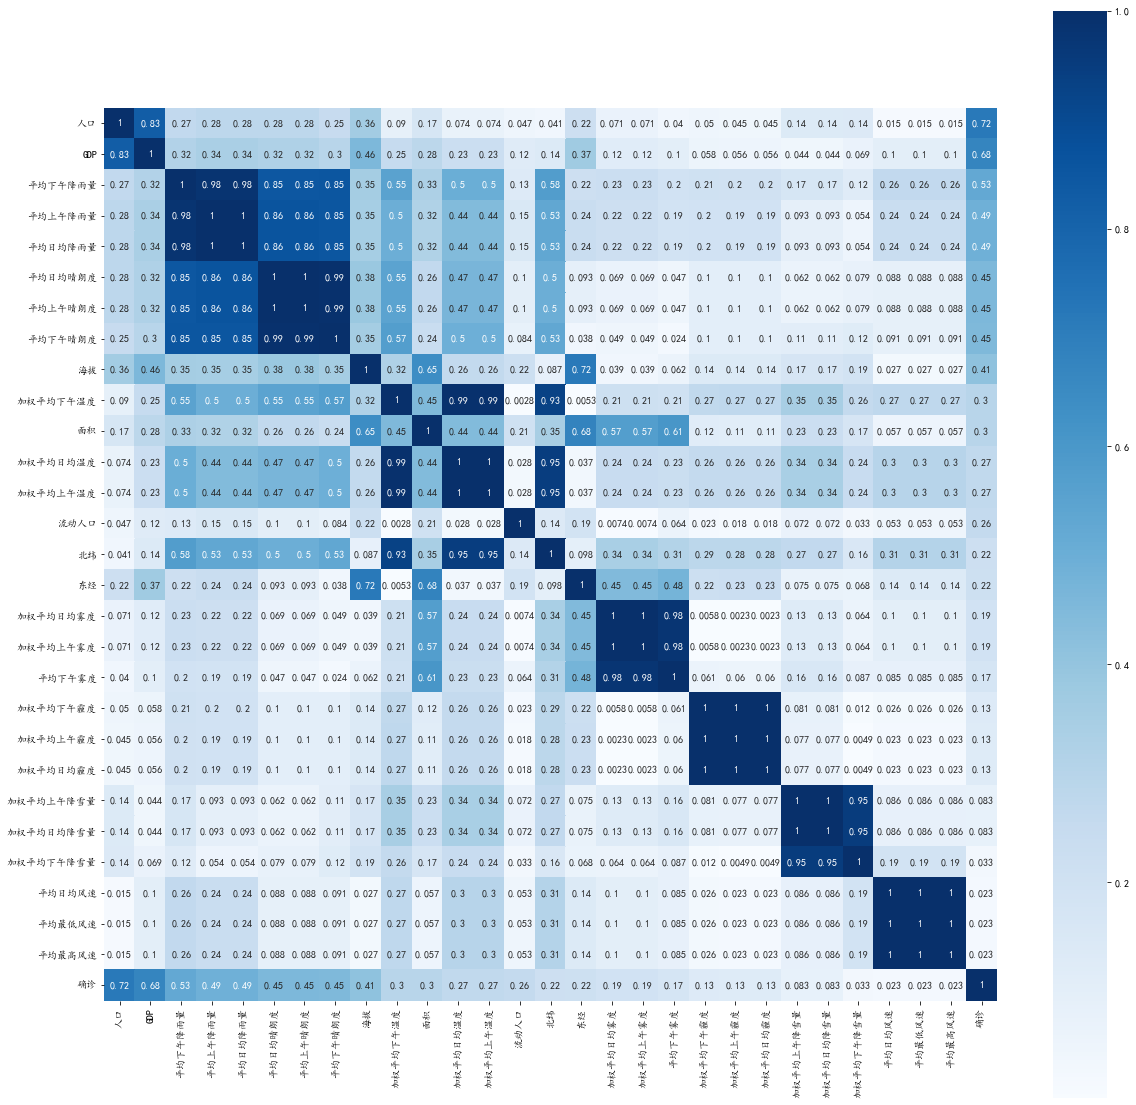

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

df_region_info_weather = df_standard[selected_factors + [selected_target]]
df_corr = df_region_info_weather.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr.abs(), annot=True, vmax=1, square=True, cmap="Blues")

如上图，将相互强相关的特征数据，取其中一个：对“上午”、“下午”、“最高”、“最低”、“日均”取“日均”。如下图。

再次筛选后的特征和目标：人口、GDP、平均日均降雨量、平均日均晴朗度、海拔、面积、加权平均日均温度、流动人口、北纬、东经、加权平均日均雾度、加权平均日均霾度、加权平均日均降雪量、平均日均风速、确诊


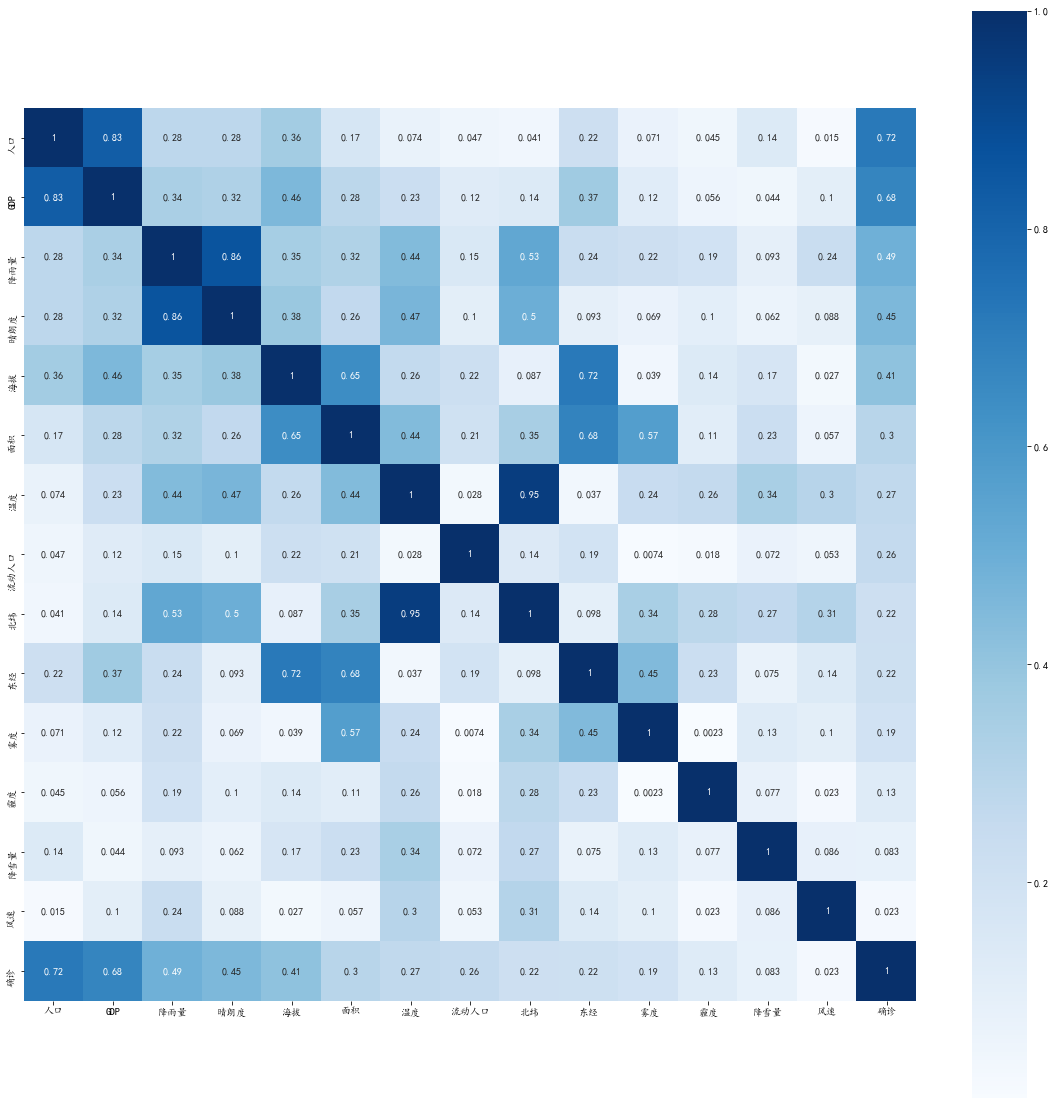

In [18]:
selected_cols = []
selected_col_short_names = []  # 后续对特征使用缩写的名称
for col in df_region_info_weather.columns:
    if '平均' in col:
        name = col.replace('加权', '').replace('上午', '').replace('下午', '').replace('最高', '')\
               .replace('最低', '').replace('日均', '')
        if '日均' in col:
            selected_cols.append(col)
            selected_col_short_names.append(name.replace('平均', ''))
    else:
        selected_cols.append(col)
        selected_col_short_names.append(col)
print('再次筛选后的特征和目标：{}'.format('、'.join(selected_cols)))
df_selected = df_region_info_weather[selected_cols]
df_selected.columns = selected_col_short_names
df_corr = df_selected.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr.abs(), annot=True, vmax=1, square=True, cmap="Blues")

In [19]:
df_corr.iloc[-1:, :-1]

,人口,GDP,降雨量,晴朗度,海拔,面积,温度,流动人口,北纬,东经,雾度,霾度,降雪量,风速
确诊,0.722614,0.675224,0.490108,-0.454388,-0.414076,-0.297293,0.268565,0.25777,-0.219034,0.215548,-0.194,-0.129874,-0.082793,0.02259


### 1.8. 相关性分析结论

In [20]:
corr_analysis = df_corr.iloc[-1:, :-1].T
corr_analysis.columns = ['和确诊的相关性（绝对值越大表示越相关）']
corr_info_dict = {
    '人口': ('人口越多的地区，越容易感染', '人口越少的地区，越容易感染'),
    'GDP': ('GDP 越高的地区，越容易感染', 'GDP 越低的地区，越容易感染'),
    '降雨量': ('降雨量越多的地区，越容易感染', '降雨量越少的地区，越容易感染'),
    '晴朗度': ('天越晴的地区，越容易感染', '天越阴的地区，越容易感染'),
    '海拔': ('海拔越高的地区，越容易感染', '海拔越低的地区，越容易感染'),
    '面积': ('面积越大的地区，越容易感染', '面积越小的地区，越容易感染'),
    '温度': ('温度越高的地区，越容易感染', '温度越低的地区，越容易感染'),
    '流动人口': ('流动人口越高的地区，越容易感染', '流动人口越低的地区，越容易感染'),
    '东经': ('越东方的地区，越容易感染', '越北方的地区，越容易感染'),
    '北纬': ('越北方的地区，越容易感染', '越南方的地区，越容易感染'),
    '雾度': ('雾越多的地区，越容易感染', '雾越少的地区，越容易感染'),
    '霾度': ('霾越多的地区，越容易感染', '霾越少的地区，越容易感染'),
    '降雪量': ('降雪量越多的地区，越容易感染', '降雪量越少的地区，越容易感染'),
    '风速': ('风速越高的地区，越容易感染', '风速越低的地区，越容易感染'),
}
desc = []
for name, val in zip(corr_analysis.index, corr_analysis.values.reshape(-1)):
    if abs(val) > 0.1:
        if val > 0:
            desc.append(corr_info_dict[name][0])
        else:
            desc.append(corr_info_dict[name][1])
    else:
        desc.append('该因素几乎没有影响')
corr_analysis['新冠状病毒影响因素分析（影响力从高到低排序）'] = desc
pd.set_option('display.max_rows', 30)
corr_analysis#.iloc[:, [-1]]

,和确诊的相关性（绝对值越大表示越相关）,新冠状病毒影响因素分析（影响力从高到低排序）
人口,0.722614,人口越多的地区，越容易感染
GDP,0.675224,GDP 越高的地区，越容易感染
降雨量,0.490108,降雨量越多的地区，越容易感染
晴朗度,-0.454388,天越阴的地区，越容易感染
海拔,-0.414076,海拔越低的地区，越容易感染
面积,-0.297293,面积越小的地区，越容易感染
温度,0.268565,温度越高的地区，越容易感染
流动人口,0.257770,流动人口越高的地区，越容易感染
北纬,-0.219034,越南方的地区，越容易感染
东经,0.215548,越东方的地区，越容易感染


**近期出行参考：少出门，若必须出门，记得戴口罩，<font color=red>晴天、低温</font>时候出门相对安全一些，人多的地方别去。**